<a href="https://colab.research.google.com/github/natiqz19/timeseries_analysis/blob/main/timeseries1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ARIMA

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [25]:
# Import the dataset
shampoo_sales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/timeseries-shampoo-sales.csv')
sales = shampoo_sales.copy()
sales['Month'] = pd.to_datetime('190' + sales['Month'])
sales

,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3
5,1901-06-01,168.5
6,1901-07-01,231.8
7,1901-08-01,224.5
8,1901-09-01,192.8
9,1901-10-01,122.9


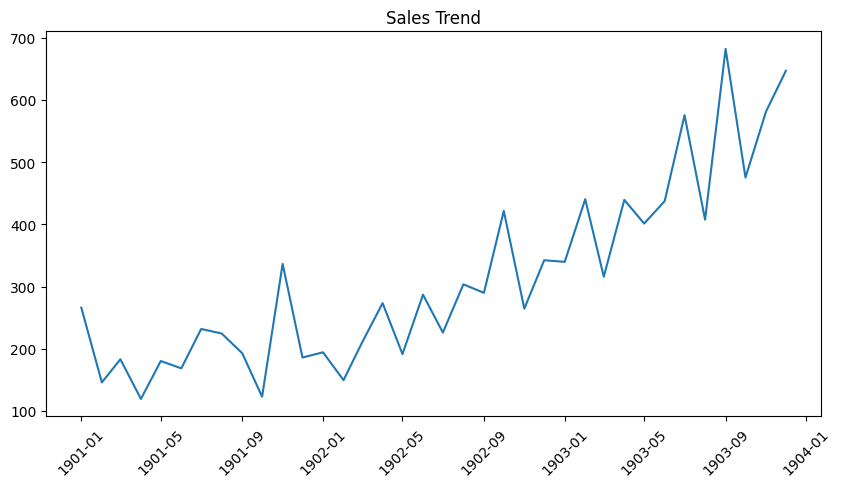

In [35]:
# Adjusting the figure size
fig = plt.subplots(figsize = (10,5))
plt.plot(sales.Month, sales.Sales)
plt.xticks(rotation = 45)
plt.title('Sales Trend')
plt.show()

# LSTM

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/


In [1]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [2]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [3]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print('X :', X)
print('y :', y)

X : [[[10]
  [20]
  [30]]

 [[20]
  [30]
  [40]]

 [[30]
  [40]
  [50]]

 [[40]
  [50]
  [60]]

 [[50]
  [60]
  [70]]

 [[60]
  [70]
  [80]]]
y : [40 50 60 70 80 90]


In [4]:
X.shape

(6, 3, 1)

In [ ]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)